In [2]:
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style("dark")


### Read in data

In [24]:
df = pd.read_csv('survey_results_public.csv.zip')

### Do people only recognize the value of DevOps once they have it?

Extremely important     48.147704
Somewhat important      30.993003
Neutral                 17.430269
Not very important       1.991278
Not at all important     1.437746
Name: NEWDevOpsImpt, dtype: float64

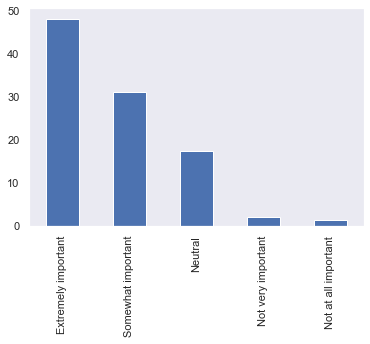

In [22]:
dev_ops_importance_total = df.NEWDevOpsImpt.dropna()
dev_ops_importance_total_n = dev_ops_importance_total.count()
dev_ops_importance_total_sum = dev_ops_importance_total.value_counts() 
dev_ops_importance_total_percentages = (dev_ops_importance_total_sum / dev_ops_importance_total_n) * 100
dev_ops_importance_total_percentages.plot(kind='bar');
dev_ops_importance_total_percentages

->  48% of developers think it is extremly important. Almost 80% think it is at least somewhat important.
But is this due to a general understanding of the importance of DevOps? Or does the awareness for DevOps only arise once developers have it in their company?

We compare the these percentages for devs that have DevOps and for those that don't to find out. 

Extremely important     62.876705
Somewhat important      27.753518
Neutral                  7.860262
Not very important       1.196830
Not at all important     0.312685
Name: NEWDevOpsImpt, dtype: float64

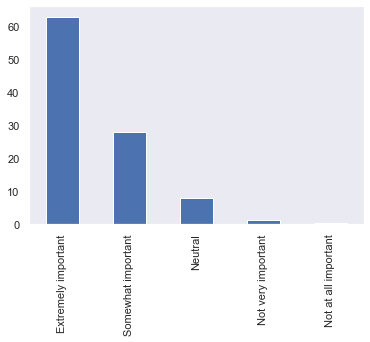

In [47]:
devs_that_have_devops = df.loc[df.NEWDevOps == 'Yes']
devs_that_have_devops_importance_sum = devs_that_have_devops.NEWDevOpsImpt.dropna().value_counts()
devs_that_have_devops_importance_sum_n = devs_that_have_devops.NEWDevOpsImpt.dropna().count()
devs_that_have_devops_importance_percentage = (devs_that_have_devops_importance_sum  / devs_that_have_devops_importance_sum_n) * 100 
devs_that_have_devops_importance_percentage.plot(kind='bar');
devs_that_have_devops_importance_percentage


In [88]:
devs_that_have_devops_frame = devs_that_have_devops_importance_percentage.to_frame()
devs_that_have_devops_frame.columns = ['% (Has DevOps)']
devs_that_have_devops_frame

,% (Has DevOps)
Extremely important,62.876705
Somewhat important,27.753518
Neutral,7.860262
Not very important,1.196830
Not at all important,0.312685


Extremely important     38.976030
Somewhat important      34.226223
Neutral                 21.567436
Not very important       2.800177
Not at all important     2.430134
Name: NEWDevOpsImpt, dtype: float64

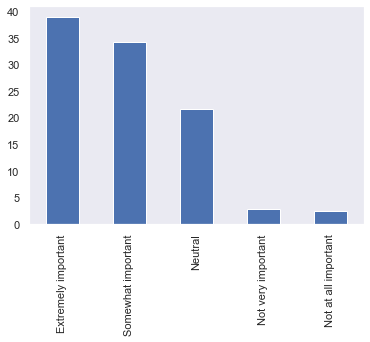

In [89]:
devs_that_dont_have_devops = df.loc[df.NEWDevOps == 'No']
devs_that_dont_have_devops_importance_sum = devs_that_dont_have_devops.NEWDevOpsImpt.dropna().value_counts()
devs_that_dont_have_devops_importance_sum_n = devs_that_dont_have_devops.NEWDevOpsImpt.dropna().count()
devs_that_dont_have_devops_importance_percentage = (devs_that_dont_have_devops_importance_sum  / devs_that_dont_have_devops_importance_sum_n) * 100 
devs_that_dont_have_devops_importance_percentage.plot(kind='bar');
devs_that_dont_have_devops_importance_percentage

In [90]:
devs_that_dont_have_devops_frame = devs_that_dont_have_devops_importance_percentage.to_frame()
devs_that_dont_have_devops_frame.columns = ['% (No DevOps)']
devs_that_dont_have_devops_frame

,% (No DevOps)
Extremely important,38.976030
Somewhat important,34.226223
Neutral,21.567436
Not very important,2.800177
Not at all important,2.430134


In [91]:
comparison_frame = devs_that_dont_have_devops_frame.join(devs_that_have_devops_frame)
comparison_frame['Importance'] = comparison_frame.index
comparison_frame

,% (No DevOps),% (Has DevOps),Importance
Extremely important,38.976030,62.876705,Extremely important
Somewhat important,34.226223,27.753518,Somewhat important
Neutral,21.567436,7.860262,Neutral
Not very important,2.800177,1.196830,Not very important
Not at all important,2.430134,0.312685,Not at all important


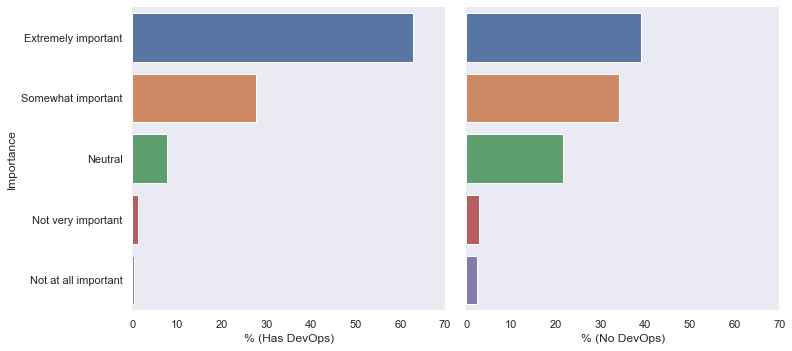

In [98]:
g = sns.PairGrid(comparison_frame, 
                 y_vars=['Importance'],
                 x_vars=[ '% (Has DevOps)', '% (No DevOps)'],
                 height=5)
g.map(sns.barplot)
g.set(xlim=(0, 70))
sns.despine(fig=g.fig, left=True)
g.savefig('recognition.png')

Use seaborn pairgrid

# Does having DevOps increase developer satisfaction?

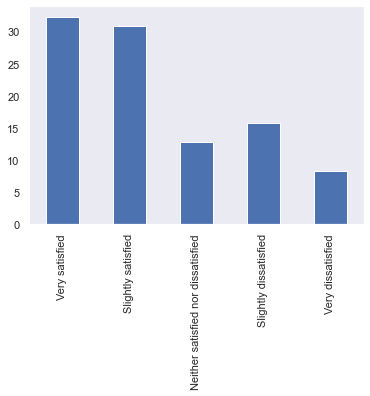

In [130]:
def prepare_job_sat(df_row):
    job_satisfaction_total = df_row.dropna().value_counts()
    job_satisfaction_n = df_row.dropna().count()
    job_satisfaction_percent = ((job_satisfaction_total / job_satisfaction_n) * 100).to_frame().reindex(['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied', 'Very dissatisfied'])
    return job_satisfaction_percent

 
job_satisfaction_percent = prepare_job_sat(df.JobSat)
job_satisfaction_percent.plot(kind='bar', legend=False);

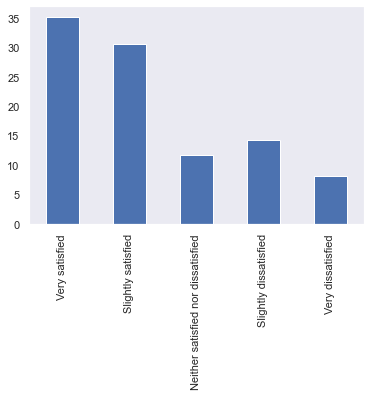

In [134]:
job_satisfaction_with_devops_percent = prepare_job_sat(df.loc[df.NEWDevOps == 'Yes'].JobSat)
job_satisfaction_with_devops_percent.plot(kind='bar', legend=False);

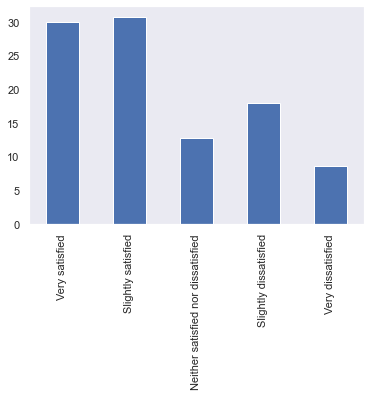

In [148]:
job_satisfaction_without_devops_percent = prepare_job_sat(df.loc[(df.NEWDevOps == 'No')].JobSat)
job_satisfaction_without_devops_percent.plot(kind='bar', legend=False);

In [142]:
job_satisfaction_with_devops_percent.columns=['% (Has DevOps)']
job_satisfaction_without_devops_percent.columns=['% (No DevOps)']
comparison_frame = job_satisfaction_with_devops_percent.join(job_satisfaction_without_devops_percent)
comparison_frame['Satisfaction'] = comparison_frame.index
comparison_frame

,% (Has DevOps),% (No DevOps),Satisfaction
Very satisfied,35.232994,29.952107,Very satisfied
Slightly satisfied,30.637386,30.748534,Slightly satisfied
Neither satisfied nor dissatisfied,11.767542,12.764355,Neither satisfied nor dissatisfied
Slightly dissatisfied,14.236743,17.989560,Slightly dissatisfied
Very dissatisfied,8.125335,8.545445,Very dissatisfied


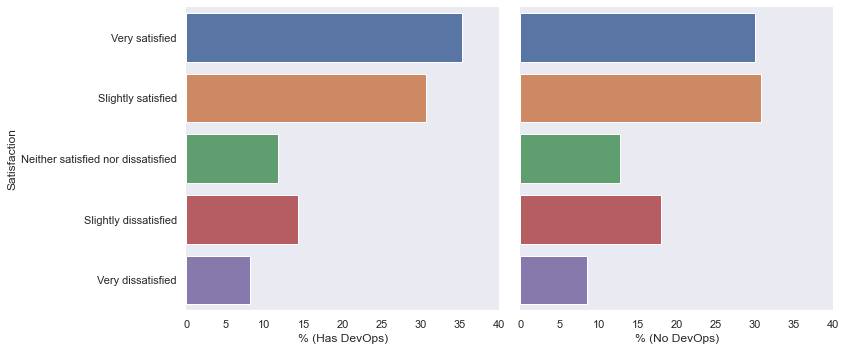

In [144]:
g = sns.PairGrid(comparison_frame, 
                 y_vars=['Satisfaction'],
                 x_vars=[ '% (Has DevOps)', '% (No DevOps)'],
                 height=5)
g.map(sns.barplot)
g.set(xlim=(0, 40))
sns.despine(fig=g.fig, left=True)
g.savefig('satisfaction.png')

# What is the state of DevOps with respect to company size - is it only applied in big companies?

<AxesSubplot:>

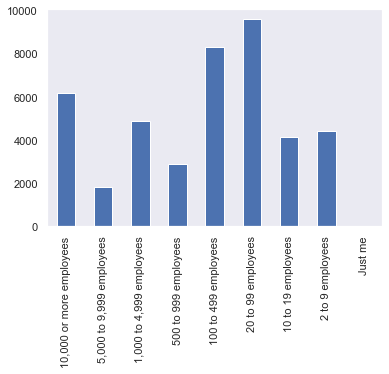

In [164]:
sorted_sizes = ['10,000 or more employees', '5,000 to 9,999 employees' ,'1,000 to 4,999 employees', '500 to 999 employees','100 to 499 employees', '20 to 99 employees', '10 to 19 employees', '2 to 9 employees', 'Just me']
company_size_total = df.OrgSize.dropna().value_counts().to_frame().reindex(sorted_sizes)
company_size_total.plot(kind='bar', legend=False)

Create line plot: Company size vs. Percentage of devs that has devops